# Application Summary Jupyter Notebook

The notebook is used simplify to set user input and display charts
The files `plotting.py` and `applicants.py` are used to generate and display charts & to create a applicant catalog.

The jupyter notebook creates a dataframe of the excle file which contains the applicant data. If the application layout changes the jupyter notebook references has to get changed too.

In [1]:
# Variables
release_version="1.24"
local_excel_file="./Kubernetes 1.24 Release Team Shadow Application (Responses).xlsx"

In [2]:
# Schema variables reference column headers of the applicant excel file
schema_previously_served = "Have you previously served on a Kubernetes Release Team?"
schema_returners_interested_in_roles = f"What release team roles are you interested in for {release_version}?"
schema_newcomers_interested_in_roles = "Which release roles are you interested in?"
schema_applied_previously = "Have you applied to any previous Kubernetes release teams?"
schema_pronouns = "To help address everyone correctly, please share your pronouns if you're comfortable doing so. You can more about pronoun sharing here https://www.mypronouns.org/sharing"
schema_returners_timezone="What time zone are you normally in?"
schema_newcomers_timezone=f"{schema_returners_timezone}.1"
schema_affiliation="Company Affiliation / Employer"

In [3]:
# Use pandas to load the local excel file and generate a dataframe
import pandas as pd
from vars import *
from plotting import *
df = pd.read_excel(local_excel_file)
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [4]:
# Filter applicants by returniung release team members and new applicants
returners = df[df[schema_previously_served].str.contains("Yes")]
newcomers = df[df[schema_previously_served].str.contains("No")]

release_teams = {
    team_bugtriage: {}, team_cisignal: {}, team_communications: {}, team_releasenotes: {}, team_documentation: {}, team_enhacements: {}
}

for team in release_teams:
    teamApplicantsReturners = returners[returners[schema_returners_interested_in_roles].str.contains(team)]
    teamApplicantsNewcomers = newcomers[newcomers[schema_newcomers_interested_in_roles].str.contains(team)]
    release_teams[team] = {
        group_returners: teamApplicantsReturners,
        group_newcomers: teamApplicantsNewcomers
    }


In [8]:
timezone_aliases={
        "gmt": "london gmt+0", "paris": "london gmt+0", "london": "london gmt+0",
        "middle europe": "central europe gmt+1", "cet": "central europe gmt+1", "+ 1": "central europe gmt+1", "central time": "central europe gmt+1", "central european time": "central europe gmt+1", "berlin": "central europe gmt+1", "+1": "central europe gmt+1", 
        "ist": "india gmt+5", "+5": "india gmt+5", "+ 5": "india gmt+5", "india": "india gmt+5", "indian": "india gmt+5", "+ 6": "india gmt+5",
        "pst": "us pacific gmt-8", "pdt": "us pacific gmt-8", "pacific": "us pacific gmt-8", "pacific time": "us pacific gmt-8",
        "edt": "us east gmt-5", "eastern time": "us east gmt-5", "us east": "us east gmt-5", "est": "us east gmt-5",
        "+4": "iran gmt+4",
        "+2": "east europe gmt+2", "eastern europe": "east europe gmt+2", "eastern standard time": "east europe gmt+2",
        "+3": "arabia gmt+3",
        "+9": "japan gmt+9", "jst": "japan gmt+9",
        "+8": "china gmt+8", "shanghai": "china gmt+8",
        "utc": "london gmt+0"
    }


Timezone of applicants with a threshold of 1


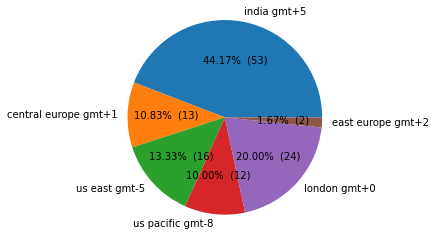

see timezones: https://24timezones.com/timezone-map

Affiliation of applicants with a threshold of 1


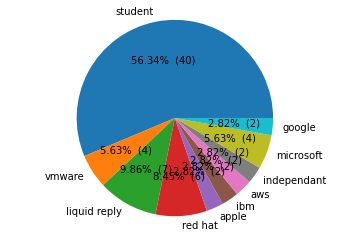

SIG-Release applicants by team
Total applicants: 125, which applied to one or multiple teams


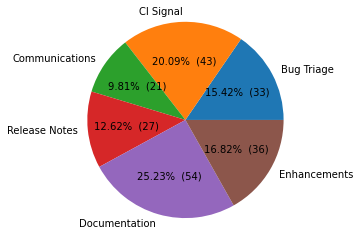

Pronouns 


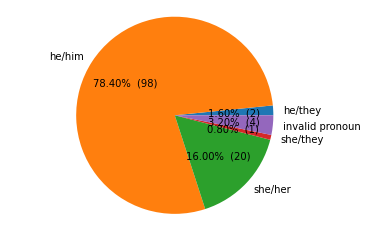

Rejected newcomers which apply again


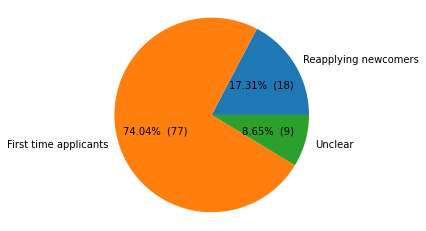

Newcomer & Returner applicants


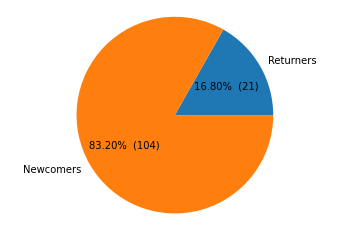

In [11]:
# Some general plotting

# General sig release wide charts
filter_entities(newcomers[schema_newcomers_timezone].tolist() + returners[schema_returners_timezone].tolist(), "Timezone", 
    aliases=timezone_aliases,
    threshold=1, unreached_threshold_print=False)
print(f"see timezones: https://24timezones.com/timezone-map")
filter_entities(df[schema_affiliation].tolist(), "Affiliation", 
    keywords=["student", "liquid reply", "vmware", "microsoft", "red hat", "institute", "cisco", "ibm", "apple", "suse", "google", "independant", "deloitte", "adesso"],
    aliases={"redhat": "red hat", "freelancer": "independant"},
    threshold=1)
applicants_by_team(len(df), release_teams)
pronouns_chart(df[schema_pronouns])
reapplying_newcomers(newcomers[schema_applied_previously])
newcomers_and_returners(returners, newcomers)




Bug Triage
Newcomer & Returner applicants for Bug Triage


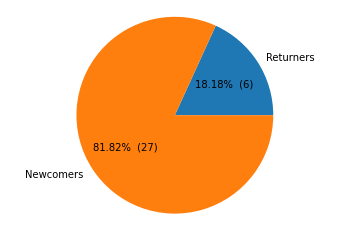

Bug Triage applicants applied to other teams
29 of 33 also applied to one or more of the other teams


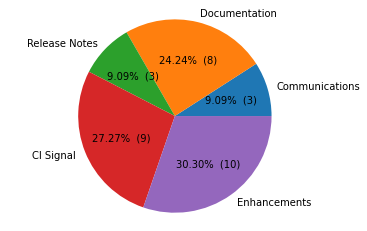

Pronouns Bug Triage


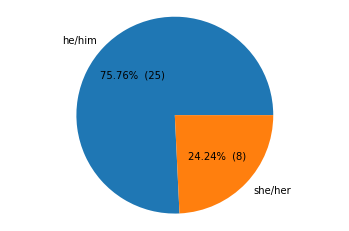


Timezone of applicants with a threshold of 1


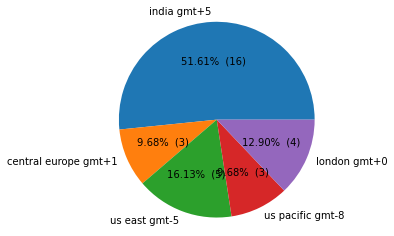



CI Signal
Newcomer & Returner applicants for CI Signal


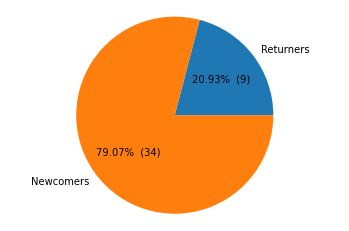

CI Signal applicants applied to other teams
33 of 43 also applied to one or more of the other teams


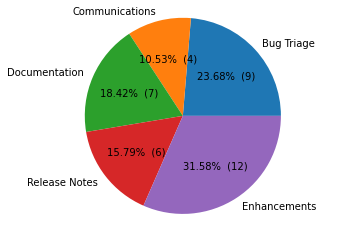

Pronouns CI Signal


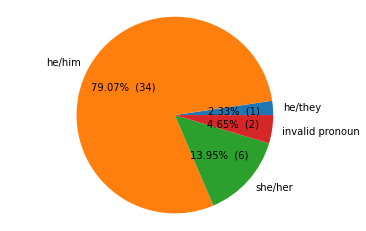


Timezone of applicants with a threshold of 1


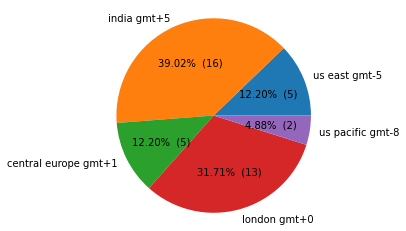



Communications
Newcomer & Returner applicants for Communications


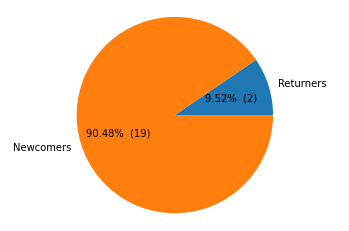

Communications applicants applied to other teams
18 of 21 also applied to one or more of the other teams


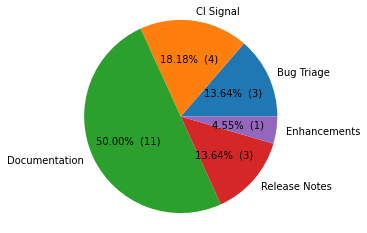

Pronouns Communications


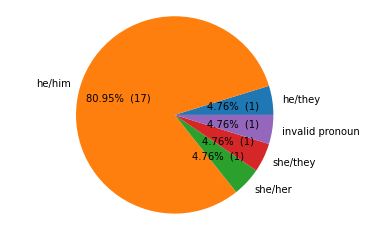


Timezone of applicants with a threshold of 1


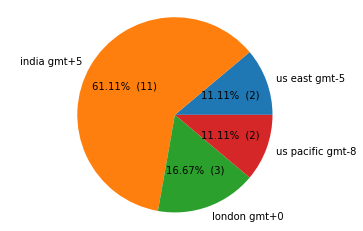



Release Notes
Newcomer & Returner applicants for Release Notes


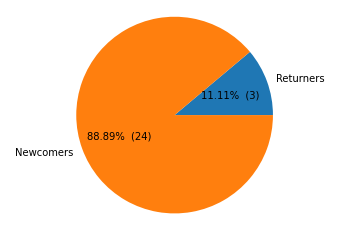

Release Notes applicants applied to other teams
23 of 27 also applied to one or more of the other teams


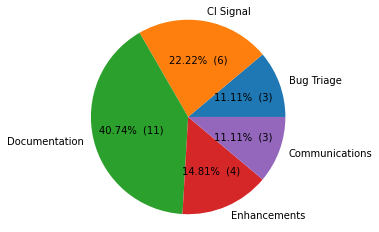

Pronouns Release Notes


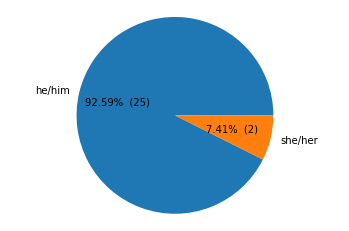


Timezone of applicants with a threshold of 1


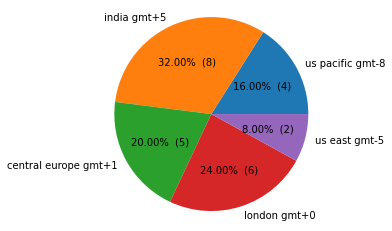



Documentation
Newcomer & Returner applicants for Documentation


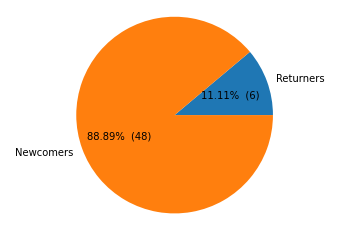

Documentation applicants applied to other teams
40 of 54 also applied to one or more of the other teams


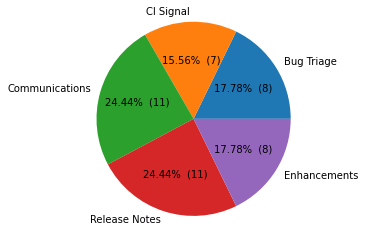

Pronouns Documentation


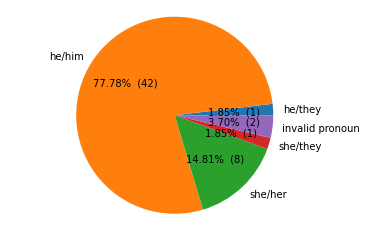


Timezone of applicants with a threshold of 1


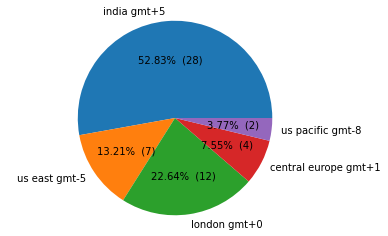



Enhancements
Newcomer & Returner applicants for Enhancements


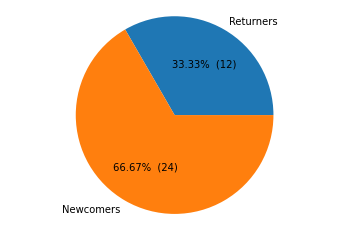

Enhancements applicants applied to other teams
30 of 36 also applied to one or more of the other teams


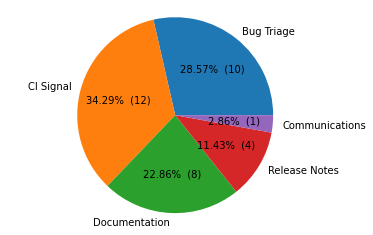

Pronouns Enhancements


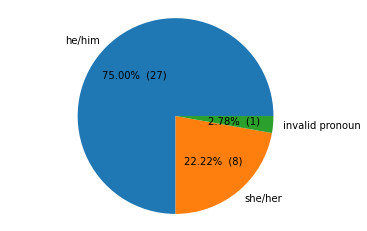


Timezone of applicants with a threshold of 1


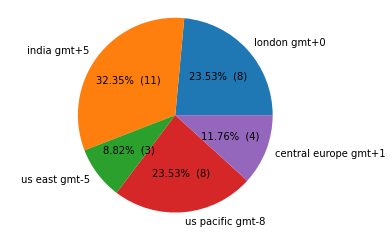

In [9]:
# Team specific charts

# Generate plots for all teams
for team in release_teams:
    print(f"\n\n{team}")
    newcomers_and_returners(release_teams[team][group_returners], release_teams[team][group_newcomers], team)
    applied_for_multiple_teams([release_teams[team][group_newcomers][schema_newcomers_interested_in_roles], release_teams[team][group_returners][schema_returners_interested_in_roles]], team, release_teams)
    pronouns_chart(release_teams[team][group_newcomers][schema_pronouns].tolist() + release_teams[team][group_returners][schema_pronouns].tolist(), team)
    filter_entities(release_teams[team][group_newcomers][schema_newcomers_timezone].tolist() + release_teams[team][group_returners][schema_returners_timezone].tolist(), "Timezone", 
        aliases=timezone_aliases,
        threshold=1, unreached_threshold_print=False, team=team)